In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
sns.set_style('darkgrid')
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [70]:
path = '../assets/results/summary_region.xlsx'
df = pd.read_excel(path)
df

,station,thaiwater_mean,gsmap_mean,persiann_mean,region
0,Kosum Phisai (2),6.095522,9.171913,21.025000,Northeastern
1,Sawee (1),6.012500,7.283291,0.412500,Southern EastCoast
2,Roi Et,15.174030,8.845717,28.504999,Northeastern
3,Nong Plub (1),4.022222,2.576148,1.143750,Southern EastCoast
4,Mae Sot,6.138505,2.171240,0.951250,Northern
...,...,...,...,...,...
118,Nakhon Phanom,13.375789,5.774265,22.232500,Northeastern
119,Roi Et (1),0.000000,8.845717,24.073752,Northeastern
120,Ubon Ratchathani,9.738298,3.147864,9.448750,Northeastern
121,Laem Chabang,5.740667,3.777253,11.718750,Eastern


In [71]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [72]:
regions = list(set(df['region']))

for region in regions:
    amon = len(set(df['station'].loc[df['region'] == region]))
    print(f'amount: {amon} region: {region}')

amount: 21 region: Central
amount: 30 region: Northern
amount: 8 region: Southern WestCoast
amount: 28 region: Northeastern
amount: 21 region: Southern EastCoast
amount: 15 region: Eastern


In [73]:
df_mean_gsmap = df.groupby(df.region)['gsmap_mean'].mean()
df_mean_gsmap = df_mean_gsmap.reset_index()
df_mean_gsmap

,region,gsmap_mean
0,Central,5.810725
1,Eastern,6.560145
2,Northeastern,5.868792
3,Northern,2.862112
4,Southern EastCoast,4.375152
5,Southern WestCoast,9.274304


In [74]:
df_mean_persiann = df.groupby(df.region)['persiann_mean'].mean()
df_mean_persiann = df_mean_persiann.reset_index()
df_mean_persiann

,region,persiann_mean
0,Central,5.741012
1,Eastern,9.666500
2,Northeastern,14.459196
3,Northern,2.195417
4,Southern EastCoast,4.001607
5,Southern WestCoast,8.050000


In [75]:
df_mean_thaiwater = df.groupby(df.region)['thaiwater_mean'].mean()
df_mean_thaiwater = df_mean_thaiwater.reset_index()
df_mean_thaiwater

,region,thaiwater_mean
0,Central,6.134349
1,Eastern,9.182828
2,Northeastern,9.077548
3,Northern,6.275136
4,Southern EastCoast,7.248119
5,Southern WestCoast,12.689083


In [76]:
dfs = df_mean_thaiwater.merge(df_mean_persiann['persiann_mean'], left_index=True, right_index=True)
dfs = dfs.merge(df_mean_gsmap['gsmap_mean'], left_index=True, right_index=True)
dfs = dfs.set_index('region')
dfs

,thaiwater_mean,persiann_mean,gsmap_mean
region,,,
Central,6.134349,5.741012,5.810725
Eastern,9.182828,9.666500,6.560145
Northeastern,9.077548,14.459196,5.868792
Northern,6.275136,2.195417,2.862112
Southern EastCoast,7.248119,4.001607,4.375152
Southern WestCoast,12.689083,8.050000,9.274304


In [77]:
dfs.corr(method=histogram_intersection)

,thaiwater_mean,persiann_mean,gsmap_mean
thaiwater_mean,1.0,38.2,34.8
persiann_mean,38.2,1.0,32.4
gsmap_mean,34.8,32.4,1.0


<AxesSubplot: xlabel='region'>

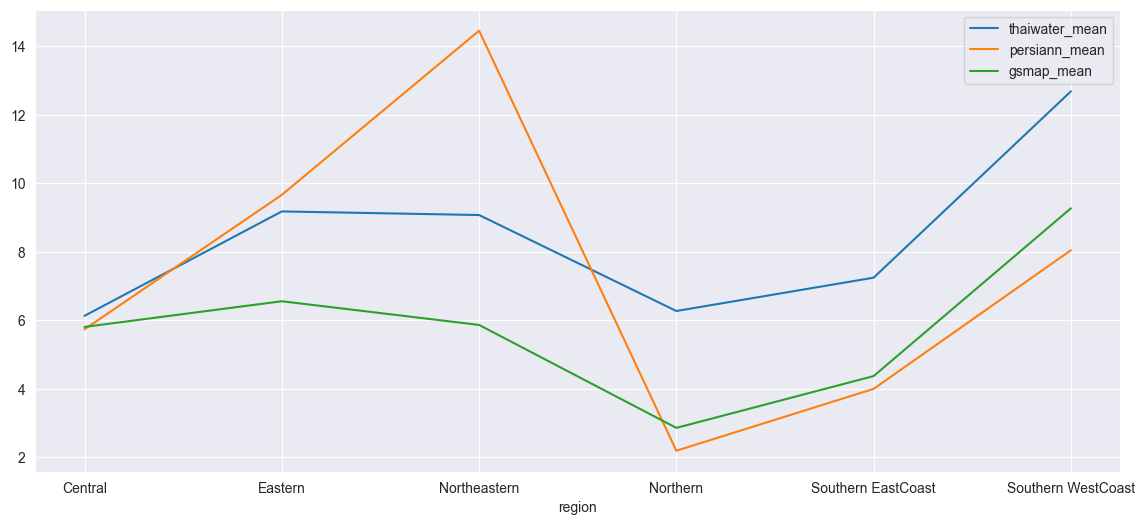

In [78]:
dfs.plot.line(figsize=(14, 6))


In [79]:
dfs = dfs.reset_index()
dfs = dfs.melt(id_vars='region')

In [80]:
dfs

,region,variable,value
0,Central,thaiwater_mean,6.134349
1,Eastern,thaiwater_mean,9.182828
2,Northeastern,thaiwater_mean,9.077548
3,Northern,thaiwater_mean,6.275136
4,Southern EastCoast,thaiwater_mean,7.248119
5,Southern WestCoast,thaiwater_mean,12.689083
6,Central,persiann_mean,5.741012
7,Eastern,persiann_mean,9.666500
8,Northeastern,persiann_mean,14.459196
9,Northern,persiann_mean,2.195417


In [81]:
dft = df.melt(id_vars='region').loc[123:]
dft

,region,variable,value
123,Northeastern,thaiwater_mean,6.095522
124,Southern EastCoast,thaiwater_mean,6.0125
125,Northeastern,thaiwater_mean,15.17403
126,Southern EastCoast,thaiwater_mean,4.022222
127,Northern,thaiwater_mean,6.138505
...,...,...,...
487,Northeastern,persiann_mean,22.2325
488,Northeastern,persiann_mean,24.073752
489,Northeastern,persiann_mean,9.44875
490,Eastern,persiann_mean,11.71875


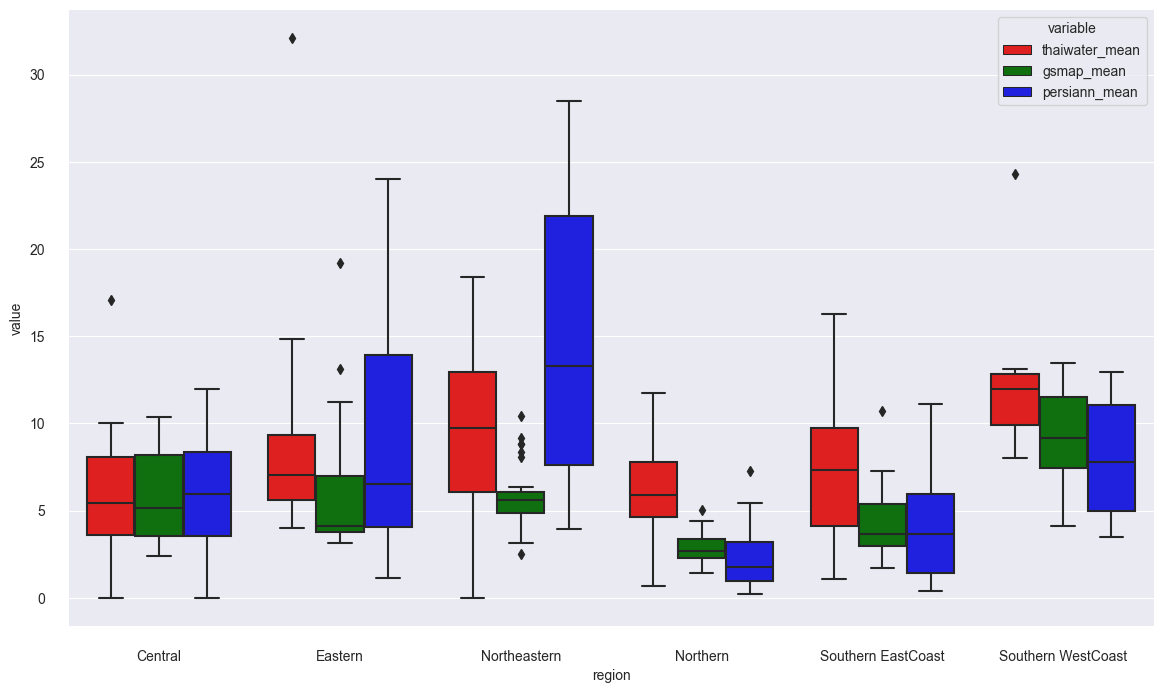

In [82]:
f, ax = plt.subplots(figsize=(14, 8))
plot_order = ['Central', 'Eastern', 'Northeastern', 'Northern', 'Southern EastCoast', 'Southern WestCoast']
sns.boxplot(x="region", y="value",
            hue="variable", palette=['r', 'g', 'b'],
            data=dft, order=plot_order)
sns.despine(offset=10, trim=True)